<img src="img/python-logo-notext.svg"
     style="display:block;margin:auto;width:10%"/>
<h1 style="text-align:center;">Convolutional Neural Nets</h1>
<h2 style="text-align:center;">Dr. Matthias Hölzl</h2>

# Darstellung von Bildern

<img src="img/ag/Figure-21-001.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

# Filter für gelbe Pixel
<img src="img/ag/Figure-21-002.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

## Funktionsweise des Gelbfilters
<img src="img/ag/Figure-21-003.png" style="width: 40%; margin-left: auto; margin-right: auto;"/>

## "Ausstanzen" der Werte
<img src="img/ag/Figure-21-004.png" style="width: 40%; margin-left: auto; margin-right: auto;"/>

## Verschieben des Filters
<img src="img/ag/Figure-21-005.png" style="width: 50%; margin-left: auto; margin-right: auto;"/>

## Beispiel
<img src="img/ag/Figure-21-006.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

## Parallele Verarbeitung
<img src="img/ag/Figure-21-007.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

## Konvolution

<img src="img/ag/Figure-21-008.png" style="width: 40%; margin-left: auto; margin-right: auto;"/>

## Konvolution: Anker

<img src="img/ag/Figure-21-009.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

## Konvolution: Funktionsweise
<img src="img/ag/Figure-21-010.png" style="width: 50%; margin-left: auto; margin-right: auto;"/>

## Input und Gewichte haben die gleiche Größe
<img src="img/ag/Figure-21-011.png" style="width: 50%; margin-left: auto; margin-right: auto;"/>

## Verschieben des Filters
<img src="img/ag/Figure-21-013.png" style="width: 40%; margin-left: auto; margin-right: auto;"/>

## Beispiel

<img src="img/ag/Figure-21-014.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

<br/>
<div style="display: block; width: 30%; float: left">
    <ul>
        <li> Rote Felder: -1</li>
        <li>Gelbe Felder: 1</li>
        <li>Schwarze Felder: 0</li>
        <li>Weiße Felder: 1</li>
    </ul>
</div>

<div style="display: block; width: 50%; float: left;">
    <ul>
        <li>Minimalwert: -6</li>
        <li>Maximalwert: 3</li>
    </ul>
</div>

<img src="img/ag/Figure-21-015.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-016.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

## Andere Betrachtungsweise: Zerschneiden von Bildern
<img src="img/ag/Figure-21-017.png" style="width: 30%; margin-left: auto; margin-right: auto;"/>

## Hierarchische Features
<img src="img/ag/Figure-21-018.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-019.png" style="width: 40%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-020.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-021.png" style="width: 50%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-022.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-023.png" style="width: 40%; margin-left: auto; margin-right: auto;"/>

# Randwerte
<img src="img/ag/Figure-21-024.png" style="width: 30%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-025.png" style="width: 35%; margin-left: auto; margin-right: auto;"/>

## Verkleinerung des Resultats

<img src="img/ag/Figure-21-026.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

## Padding
<img src="img/ag/Figure-21-027.png" style="width: 35%; margin-left: auto; margin-right: auto;"/>

# ConvNet für MNIST
<img src="img/ag/Figure-21-048.png" style="width: 60%; margin-left: auto; margin-right: auto;"/>

## Performance
<img src="img/ag/Figure-21-049.png" style="width: 50%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-050.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

In [1]:
from fastai.vision.all import *
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
model = nn.Sequential(
    nn.Conv2d(1, 32, 3, 1),
    nn.ReLU(),
    nn.Conv2d(32, 64, 3, 1),
    nn.MaxPool2d(2),
    nn.Dropout2d(0.25),
    nn.Flatten(1),
    nn.Linear(9216, 128),
    nn.ReLU(),
    nn.Dropout2d(0.5),
    nn.Linear(128, 10),
    nn.LogSoftmax(dim=1)
)

In [3]:
transform = transforms.Compose([transforms.ToTensor()])
batch_size = 256
test_batch_size = 512
epochs = 5
learning_rate = 0.001

In [4]:
train_loader = DataLoader(
    datasets.MNIST('../data', train=True, download=True, transform=transform),
                   batch_size=batch_size, shuffle=True)
test_loader = DataLoader(
    datasets.MNIST('../data', train=False, transform=transform),
                   batch_size=test_batch_size, shuffle=True)

9913344it [00:01, 9103136.74it/s]                             


Extracting ../data\MNIST\raw\train-images-idx3-ubyte.gz to ../data\MNIST\raw



29696it [00:00, 29705235.29it/s]         

Extracting ../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../data\MNIST\raw




1649664it [00:00, 9770910.80it/s]                            


Extracting ../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../data\MNIST\raw



5120it [00:00, 5120371.12it/s]          

Extracting ../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\MNIST\raw



In [5]:
data = DataLoaders(train_loader, test_loader)

In [7]:
learn = Learner(data, model, loss_func=F.nll_loss, opt_func=Adam, metrics=accuracy)

SuggestedLRs(valley=0.00010964782268274575)

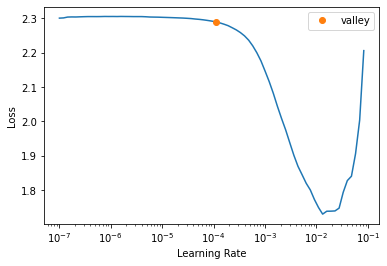

In [8]:
learn.lr_find()

In [138]:
learn.fit_one_cycle(epochs, learning_rate)

epoch,train_loss,valid_loss,accuracy,time
0,0.357799,0.162419,0.950200,00:05
1,0.142247,0.059796,0.981200,00:04
2,0.092550,0.042157,0.987000,00:04
3,0.067195,0.034268,0.988500,00:04
4,0.053428,0.033358,0.988900,00:05


# Stride 1
<img src="img/ag/Figure-21-028.png" style="width: 40%; margin-left: auto; margin-right: auto;"/>

## Stride 3 $\times$ 2
<img src="img/ag/Figure-21-029.png" style="width: 20%; margin-left: auto; margin-right: auto;"/>

## Stride 3 $\times$ 2
<img src="img/ag/Figure-21-030.png" style="width: 50%; margin-left: auto; margin-right: auto;"/>

## Gleichförmige Strides: 2, 3
<img src="img/ag/Figure-21-031.png" style="width: 50%; margin-left: auto; margin-right: auto;"/>

## Stride = Filtergröße
<img src="img/ag/Figure-21-032.png" style="width: 50%; margin-left: auto; margin-right: auto;"/>

## Farbbilder: Mehrere Layer
<img src="img/ag/Figure-21-033.png" style="width: 40%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-034.png" style="width: 40%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-035.png" style="width: 40%; margin-left: auto; margin-right: auto;"/>

## Stacks von Konvolutionen
<img src="img/ag/Figure-21-036.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-037.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-038.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

# 1D-Konvolution
<img src="img/ag/Figure-21-039.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

# 1$\times$1-Konvolution
<img src="img/ag/Figure-21-040.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

# 1$\times$1-Konvolution: Dimensionsreduktion
<img src="img/ag/Figure-21-041.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

# Padding und Upsampling (Fractional Convolution)

<img src="img/ag/Figure-21-042.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

## Kein Padding
<img src="img/ag/Figure-21-043.png" style="width: 40%; margin-left: auto; margin-right: auto;"/>

## 1 Pixel Padding
<img src="img/ag/Figure-21-044.png" style="width: 30%; margin-left: auto; margin-right: auto;"/>

## 2 Pixel Padding
<img src="img/ag/Figure-21-045.png" style="width: 35%; margin-left: auto; margin-right: auto;"/>

## Upsampling durch Konvolution
<img src="img/ag/Figure-21-046.png" style="width: 35%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-047.png" style="width: 35%; margin-left: auto; margin-right: auto;"/>

# VGG 16
<img src="img/ag/Figure-21-051.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-052.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-053.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-054.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-055.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-056.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

## Beispiel-Klassifizierung
<img src="img/ag/Figure-21-057.png" style="width: 40%; margin-left: auto; margin-right: auto;"/>

# Klassifizierung von Bildern mit VGG16

In [9]:
path = untar_data(URLs.DOGS)

In [166]:
path.ls()

(#4) [Path('/home/tc/.fastai/data/dogscats/sample'),Path('/home/tc/.fastai/data/dogscats/train'),Path('/home/tc/.fastai/data/dogscats/test1'),Path('/home/tc/.fastai/data/dogscats/valid')]

In [145]:
files = get_image_files(path/'images')
len(files)

7390

In [146]:
files[0]

Path('/home/tc/.fastai/data/oxford-iiit-pet/images/Ragdoll_18.jpg')

In [149]:
def label_func(f):
    return f[0].isupper()

In [150]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

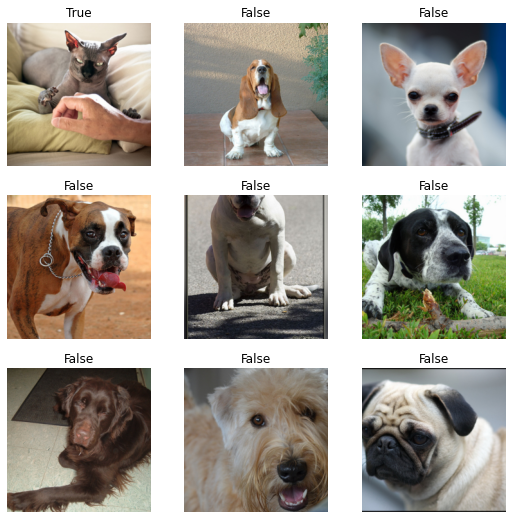

In [154]:
dls.show_batch()

In [159]:
learn = cnn_learner(dls, vgg16_bn, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.150711,0.033661,0.014208,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.035166,0.010116,0.004736,00:38


In [161]:
learn.predict(files[0]), files[0]

(('True', tensor(1), tensor([2.8910e-13, 1.0000e+00])),
 Path('/home/tc/.fastai/data/oxford-iiit-pet/images/Ragdoll_18.jpg'))

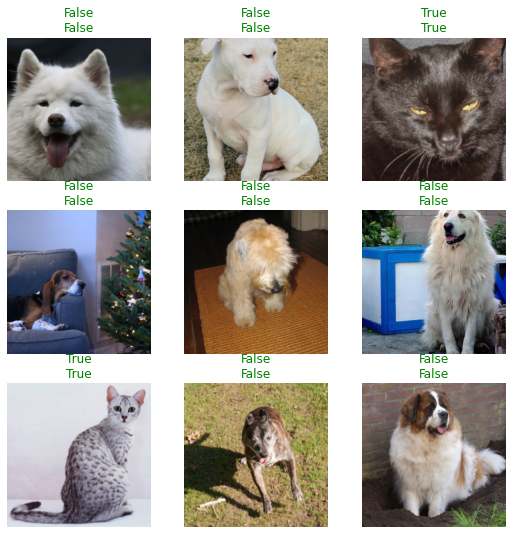

In [163]:
learn.show_results()

## Visualisierung von VGG16 (Gradient Ascent)
<img src="img/ag/Figure-21-058.png" style="width: 35%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-059.png" style="width: 35%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-060.png" style="width: 35%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-061.png" style="width: 35%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-062.png" style="width: 35%; margin-left: auto; margin-right: auto;"/>

# Visualisierung (Effekt einzelner Layer)
<img src="img/ag/Figure-21-063.png" style="width: 35%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-064.png" style="width: 35%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-065.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-066.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-067.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-068.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

# Adverserial Examples
<img src="img/ag/Figure-21-069.png" style="width: 50%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-070.png" style="width: 50%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-21-071.png" style="width: 50%; margin-left: auto; margin-right: auto;"/>